# Optional Lab: Logistic Regression

## Dataset 
Let's start with the same dataset as before.

In [23]:
import numpy as np
import copy

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

## Sigmoid or Logistic Function
<img align="left" src="./images/C1_W3_LogisticRegression_left.png"     style=" width:300px; padding: 10px; " >As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b $$, to predict $y$ given $x$.
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$$ g(z) = \frac{1}{1+e^{-z}}\tag{1} $$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

In [24]:
# sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# prediction function
def predict(x, w, b):
  return sigmoid(np.dot(x, w) + b)

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [25]:
# cost function
def logistic_cost(x, y, w, b):
  m, n = x.shape
  J = 0.0
  for i in range(m):
    z = np.dot(x[i], w) + b
    f_wb = sigmoid(z)
    J += y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb)

  return -J / m

## Logistic Gradient Descent
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [26]:
# gradient
def logistic_gradient(x, y, w, b):
  m, n = x.shape # num of examples, num of feature
  dj_dw = np.zeros(n)
  dj_db = .0
  for i in range(m):
    f_wb = sigmoid(np.dot(x[i], w) + b)
    error = f_wb - y[i]
    dj_db += error
    for j in range(n):
      dj_dw += error * x[i][j]

  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

In [27]:
def gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, num_iters):
  w_out = copy.deepcopy(w)
  b_out = 0
  # An array to store cost J and w's at each iteration primarily for graphing later
  J_history = []
  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w_out, b_out)
    w_out = w_out - alpha * dj_dw
    b_out = b_out - alpha * dj_db
    if i < 100000:
      J_history.append(cost_function(x, y, w_out, b_out))
  return w_out, b_out, J_history

## Result:

In [30]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741])

w, b, J_hist =gradient_descent(x=X, y=y, w = np.zeros_like(w_init), b = .0,
                 cost_function = logistic_cost, gradient_function = logistic_gradient,
                 alpha = 5.0e-7, num_iters = 10000)
print(f"w: {w}, b: {b}")

w: [0.00207199 0.00207199], b: -3.6739226415094047e-06


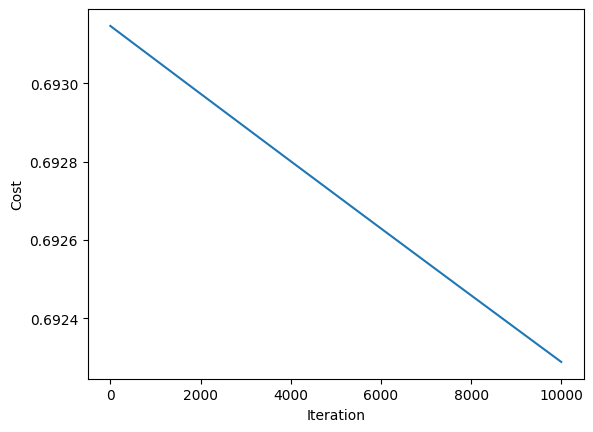

In [35]:
# plot the cost function
import matplotlib.pyplot as plt
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [40]:
# predict
print(predict([6, 6], w, b))

0.5062147224734628
